WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtua

INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 340
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (6) is too small than the required number                     for the learning rate finder (204). The results might not be optimal.


Finding best initial lr:   0%|          | 0/204 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarn

Predicting: 6it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


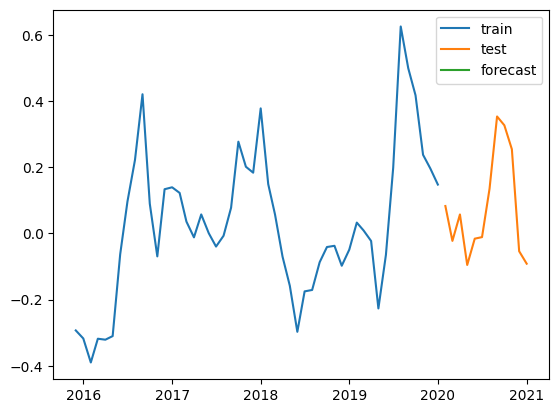

In [9]:
import pandas as pd
import sys
from utils import *


train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[0]
test = test_size[0]

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)

df_train['ds'] = pd.to_datetime(df_train['ds'])
df_test['ds'] = pd.to_datetime(df_test['ds'])

# Function to find the closest first day of the month
def closest_first_day(date):
    first_day_this_month = date.replace(day=1)
    first_day_next_month = first_day_this_month + pd.offsets.MonthBegin(1)
    if date.day > 15:
        return first_day_next_month
    else:
        return first_day_this_month

# Apply the function to each date in the 'dates' column
df_train['ds'] =df_train['ds'].apply(closest_first_day)
df_test['ds'] =df_test['ds'].apply(closest_first_day)

forecast_horizon = 10

from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
model = NeuralProphet(n_lags=5, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_train, freq='M')
future = model.make_future_dataframe(df_train, periods=20)
forecast = model.predict(future)

# plot the forecast
fig, ax = plt.subplots()
ax.plot(df_train['ds'], df_train['y'], label='train')
ax.plot(df_test['ds'], df_test['y'], label='test')
ax.plot(forecast['ds'], forecast['yhat1'], label='forecast')
ax.legend()
plt.show()


In [11]:
future = model.make_future_dataframe(df_train, periods=10)

future

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarn

,y,ds
0,0.499565,2019-09-01
1,0.417749,2019-10-01
2,0.237808,2019-11-01
3,0.196420,2019-12-01
4,0.147773,2020-01-01
5,NaN,2020-02-01


In [7]:
forecast = model.predict(future, decompose = False)

forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [93.333]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [93.333]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 10 rows at the end with NaNs in 'y' column.


Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,yhat9,yhat10
0,2019-09-01,0.499565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-01,0.417749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-01,0.237808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-01,0.196420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,0.147773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-01,NaN,0.266967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-01,NaN,NaN,0.415733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-04-01,NaN,NaN,NaN,0.498259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-05-01,NaN,NaN,NaN,NaN,0.614164,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-06-01,NaN,NaN,NaN,NaN,NaN,0.756906,NaN,NaN,NaN,NaN,NaN


In [98]:
future = model.make_future_dataframe(df_train, periods=100)
#forecast = model.predict(future)

future

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 10.
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/data_science_exam/lib/python3.12/site-packages/neuralprophet/forecaster.py:2791: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,y,ds
0,0.499565,2019-09-01
1,0.417749,2019-10-01
2,0.237808,2019-11-01
3,0.196420,2019-12-01
4,0.147773,2020-01-01
5,NaN,2020-02-01
6,NaN,2020-03-01
7,NaN,2020-04-01
8,NaN,2020-05-01
9,NaN,2020-06-01


In [73]:
import pandas as pd
import sys
from utils import *


train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[0]
test = test_size[0]

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)

df_train['ds'] = pd.to_datetime(df_train['ds'])
df_test['ds'] = pd.to_datetime(df_test['ds'])

# Function to find the closest first day of the month
def closest_first_day(date):
    first_day_this_month = date.replace(day=1)
    first_day_next_month = first_day_this_month + pd.offsets.MonthBegin(1)
    if date.day > 15:
        return first_day_next_month
    else:
        return first_day_this_month

# Apply the function to each date in the 'dates' column
df_train['ds'] =df_train['ds'].apply(closest_first_day)
df_test['ds'] =df_test['ds'].apply(closest_first_day)

forecast_horizon = 20

# calculate size of validation set
# if len(df_train) < forecast_horizon:
#     valid_size = 0.2
# elif len(df_train) > forecast_horizon:
#     valid_size = forecast_horizon/len(df_train)
# else:
#     valid_size = 0.2

# valid_size = forecast_horizon/len(df_train)

# df_train = make_series_stationary(df_train).fillna(0)

# optimal_lags_dict = calculate_optimal_lags(df_train)   
# optimal_lags = max(optimal_lags_dict.values())

# df_train = calculate_moving_averages(df_train, 'M')

# lagged_regressor_cols = df_train.columns[2:]

# epochs=[200]
daily_seasonality=['auto']
weekly_seasonality=['auto']
yearly_seasonality=['auto'] # ['True', 4,5,6,7]
# loss_func=['MAE','MSE','Huber']
seasonality_mode=['additive','multiplicative']
n_changepoints=[10,30,60]
# learning_rate=[0.01,0.001,1]

model_params =\
{
# 'epochs':hp.choice('epochs',epochs), 
'daily_seasonality':hp.choice('daily_seasonality',daily_seasonality),
'weekly_seasonality':hp.choice('weekly_seasonality',weekly_seasonality),
'yearly_seasonality':hp.choice('yearly_seasonality',yearly_seasonality),
# 'loss_func':hp.choice('loss_func',loss_func),
'seasonality_mode': hp.choice('seasonality_mode',seasonality_mode),     # additive = T+S+e, (Trend, Seasonality, error)
                                                                        # multiplicative = T*S*e 
'n_changepoints':hp.choice('n_changepoints',n_changepoints),            # Number of potential trend changepoints to include
# 'learning_rate':hp.choice('learning_rate',learning_rate),               
}

ip_params=\
{
'df':df_train,                                        # dataframe
'freq':None,                                    # model calculates frequency automatically
'n_historic_predictions':True,                  # number of historic points included for past projection
'periods':forecast_horizon,                                   # number of points for future projection
'valid_p':0.2,                                  # train_test_split
'max_evals': 10,                                # maximum evaluations for hyperparameter tuning
'lagged_regressor_cols': None, # columns used as lagged regressors
}

op_params=\
{
'n_lags': forecast_horizon,                        # previous time series steps to include in AR (or) AR-Order
'n_forecasts': forecast_horizon,                              # Number of steps ahead of prediction time step to forecast.   
# 'ar_layers':[32, 32, 32, 32],                   # architecture layers for autoregression
}

In [72]:
import pandas as pd
import sys
from utils import *
from time import sleep

def rolling_origin_func(df, forecast_horizon, roll_step=1):
    '''
    Rolling Origin Validation for Time Series Forecasting
    Parameters:
    df (DataFrame): Time Series Data
    forecast_horizon (int): Number of periods to forecast
    roll_step (int): Step size for rolling origin validation
    
    Returns:
    train_test_splits (list): List of tuples containing train and test dataframes
    
    Source: https://github.com/michael-berk/DS_academic_papers/blob/master/28_prophet_vs_neural_prophet.py
    '''

    train_test_split_indices = list(range(len(df.index) - forecast_horizon - 10, len(df.index) - forecast_horizon, roll_step))
    train_test_splits = [(df.iloc[:i, :], df.iloc[i:(i+forecast_horizon), :]) for i in train_test_split_indices]
    return train_test_splits

train_size = [50, 250, 750]
test_size = [360]

for train in train_size:
    for test in test_size:
        df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
        df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

        # rename columns to fit neural prophet requirements
        df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
        df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

        # remove columns that are not needed
        df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
        df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)

        df_train['ds'] = pd.to_datetime(df_train['ds'])
        df_test['ds'] = pd.to_datetime(df_test['ds'])

        # take 10% of df_test
        df_test = df_test[158:190]

        # Function to find the closest first day of the month
        def closest_first_day(date):
            first_day_this_month = date.replace(day=1)
            first_day_next_month = first_day_this_month + pd.offsets.MonthBegin(1)
            if date.day > 15:
                return first_day_next_month
            else:
                return first_day_this_month

        # Apply the function to each date in the 'dates' column
        df_train['ds'] =df_train['ds'].apply(closest_first_day)
        df_test['ds'] =df_test['ds'].apply(closest_first_day)


        forecast_horizon_test = len(df_test)

        train_test_splits = rolling_origin_func(pd.concat([df_train, df_test], axis=0), forecast_horizon_test, roll_step=1)

        for x in train_test_splits:
            train_df, test_df = x
            print(train_df.shape)
            
            print(test_df.shape)
            model = NeuralProphet(n_lags = 5, n_forecasts = len(test_df))

            model.fit(df = train_df, freq="MS")
            #sleep(1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 4
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/100 [00:00<?, ?it/s]

(40, 2)
(32, 2)


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.52E-01


  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.52E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.58E-02
Epoch[406/1000]:  40%|████      | 405/1000 [00:03<00:04, 119.84it/s, SmoothL1Loss=0.00187, MAE=0.0329, RMSE=0.0453, Loss=0.00135, RegLoss=0]


KeyboardInterrupt: 

In [40]:
len(test_df)

0

In [16]:
from neuralprophet.df_utils import infer_frequency

for i, (df_train, df_val) in enumerate(train_test_splits):
    print(f"Training on split {i+1}/{len(train_test_splits)}")
    print(infer_frequency(df_train, "D", n_lags = 5))

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 88.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 88.462% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 88.889% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 85.714% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_fr

Training on split 1/14
D
Training on split 2/14
D
Training on split 3/14
D
Training on split 4/14
D
Training on split 5/14
D
Training on split 6/14
D
Training on split 7/14
D
Training on split 8/14
D
Training on split 9/14
D
Training on split 10/14
D
Training on split 11/14
D
Training on split 12/14
D
Training on split 13/14
D
Training on split 14/14
D


In [6]:
train_test_splits[0][0]

,y,ds
0,-0.293288,2015-12-01
1,-0.317625,2016-01-01
2,-0.390225,2016-02-01
3,-0.318396,2016-03-01
4,-0.321321,2016-04-01
5,-0.310451,2016-05-01
6,-0.063297,2016-06-01
7,0.096580,2016-07-01
8,0.222355,2016-08-01
9,0.420914,2016-09-01


In [8]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
metrics = m.fit(train_test_splits[0][0], freq="MS")

df_future = m.make_future_dataframe(train_test_splits[0][0], periods=12)
forecast_1 = m.predict(df_future, raw=True, decompose=False)
forecast_2 = m.predict(df_future, raw=True, decompose=True)
forecast_3 = m.predict(df_future, raw=False, decompose=True)
forecast_4 = m.predict(df_future, raw=False, decompose=False)



INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.82E-01, min: 1.81E-02


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.52E+00, min: 3.35E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.44E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:07<00:00, 129.93it/s, SmoothL1Loss=0.00451, MAE=0.0432, RMSE=0.0599, Loss=0.00362, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_freque

In [32]:
from neuralprophet import NeuralProphet

args = {'model_params':model_params,'ip_params':ip_params,'op_params':op_params}

df_temp = args['ip_params']['df']

model = NeuralProphet(**{**args['model_params'],**args['op_params']})

f_train, df_val = model.split_df(df_temp, freq=args['ip_params']['freq'], valid_p=args['ip_params']['valid_p'])

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


AssertionError: 

In [26]:
f_train.merge(df_val, on='ds', how='outer')

,ds,y_x,y_y
0,2015-12-01,-0.293288,NaN
1,2016-01-01,-0.317625,NaN
2,2016-02-01,-0.390225,NaN
3,2016-03-01,-0.318396,NaN
4,2016-04-01,-0.321321,NaN
5,2016-05-01,-0.310451,NaN
6,2016-06-01,-0.063297,NaN
7,2016-07-01,0.096580,NaN
8,2016-08-01,0.222355,NaN
9,2016-09-01,0.420914,NaN


In [1]:
import pandas as pd

train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[0]
test = test_size[0]

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)


In [30]:
from neuralprophet import NeuralProphet

def train_and_test(df_train, df_test, trend_reg=1, **kwargs):
    
    # train model
    model = NeuralProphet(trend_reg=trend_reg)
    model.fit(df_train, freq='M', **kwargs)

    # make forecast on the past
    forecast_past = model.predict(df_train)

    # make predictions
    future = model.make_future_dataframe(df_train, n_historic_predictions=True, periods=len(df_test))
    forecast = model.predict(future)

    # evaluate predictions
    #mse = mean_squared_error(df_test['y'], forecast['yhat1'])

    return model, forecast_past, forecast

In [ ]:
# train and test models with different hyperparameters
models = []
forecasts_past = []
forecasts = []

for trend_reg in [0, 1, 10, 100, 1000]:
    for trend_reg_threshold in [True, False]:

        model, forecast_past, forecast = train_and_test(df_train, df_test, trend_reg=trend_reg, trend_reg_threshold=trend_reg_threshold)
        models.append(model)
        forecasts_past.append(forecast_past)
        forecasts.append(forecast)

In [ ]:
# plot all components for all models
for model, forecast in zip(models, forecasts):
    fig_comp = model.plot_components(forecast)

    # Add lable that indicates the trend regularization
    fig_comp.add_annotation(
        x=0.5,
        y=0.9,
        xref='paper',
        yref='paper',
        text=f'Trend regularization: {model.config.get('trend_reg')} {model.config.get('trend_reg_threshold')}',)

    fig_comp.show()

In [8]:
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

m_baseline = NeuralProphet()
df_train_2, df_val = m_baseline.split_df(df_train, freq='M', valid_p = 0.20)
metrics = m_baseline.fit(df_train_2, freq='M',validation_df=df_val, minimal = True)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds

Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

In [6]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,0.725309,0.810544,0.934473,0.0,0,0.440338,0.520314,0.386695,0.0
1,0.698512,0.784051,0.895561,0.0,1,0.423706,0.501306,0.369325,0.0
2,0.672759,0.758735,0.858369,0.0,2,0.408815,0.487007,0.353579,0.0
3,0.646204,0.732657,0.819996,0.0,3,0.393973,0.469132,0.337229,0.0
4,0.620715,0.707718,0.783131,0.0,4,0.378926,0.450130,0.320592,0.0
...,...,...,...,...,...,...,...,...,...
355,0.320589,0.382078,0.339796,0.0,355,0.071798,0.092809,0.020219,0.0
356,0.320502,0.381999,0.339671,0.0,356,0.071807,0.090215,0.020220,0.0
357,0.320601,0.382095,0.339805,0.0,357,0.071798,0.089578,0.020217,0.0
358,0.320537,0.382030,0.339718,0.0,358,0.071797,0.094181,0.020213,0.0


In [ ]:
# train and test models with different hyperparameters
models = []
forecasts_past = []
forecasts = []

df_train_2, df_val = m_baseline.split_df(df_train, freq='M', valid_p = 0.20)

for early_stopping in [True, False]:
    model, forecast_past, forecast = train_and_test(df_train_2, df_val, early_stopping=early_stopping, validation_df=df_val)
    models.append(model)
    forecasts_past.append(forecast_past)
    forecasts.append(forecast)

In [35]:
model1.trainer.chekpoint_callback.best_model_path

AttributeError: 'Trainer' object has no attribute 'chekpoint_callback'

In [33]:
# plot all components for all models
import plotly.graph_objs as go

for model, forecast in zip(models, forecasts):
    fig_comp = model.plot_components(forecast)

    # Add lable that indicates the trend regularization
    fig_comp.add_annotation(
        x=0.5,
        y=0.9,
        xref='paper',
        yref='paper',
        text=f'Early stopping: {model.early_stopping}',)
    
    fig_comp.show()
    
    fig = model.plot(forecast)

    # Add the test data to the plot
    fig.add_trace(go.Scatter(x=df_val['ds'], y=df_val['y'], mode='markers', name='Test data'))

    fig.show()

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [35]:
import plotly.graph_objs as go

# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df_train, n_historic_predictions=True, periods=len(df_test))

# Predict the future
forecast = m.predict(df_future)

# Predict the past
forecast_past = m.predict(df_train)

# Visualize the forecast
# Visualize the forecast
fig = m.plot(forecast)

# Add the test data to the plot
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'], mode='markers', name='Test data'))

fig.show()

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.774]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.774]% of the data.
IN

Predicting: 7it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 7it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [36]:
m.plot_components(forecast_past)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'a3c4af96-9c3e-49bb-b22c-7f5e6230aad8',
              'x': array([datetime.datetime(2015, 12, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 31, 0, 0),
                          datetime.datetime(2016, 3, 1, 0, 0),
                          datetime.datetime(2016, 4, 1, 0, 0),
                          datetime.datetime(2016, 5, 1, 0, 0),
                          datetime.datetime(2016, 6, 1, 0, 0),
                          datetime.datetime(2016, 7, 1, 0, 0),
                          datetime.datetime(2016, 7, 31, 0, 0),
                          datetime.datetime(2016, 8, 31, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0),
                          datet

In [29]:
m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/.virtualenvs/test/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'a9f65670-0e01-4627-ac66-4f6b56e70f62',
              'x': array([datetime.datetime(2015, 12, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 31, 0, 0),
                          datetime.datetime(2016, 3, 1, 0, 0),
                          datetime.datetime(2016, 4, 1, 0, 0),
                          datetime.datetime(2016, 5, 1, 0, 0),
                          datetime.datetime(2016, 6, 1, 0, 0),
                          datetime.datetime(2016, 7, 1, 0, 0),
                          datetime.datetime(2016, 7, 31, 0, 0),
                          datetime.datetime(2016, 8, 31, 0, 0),
                          datetime.datetime(2016, 9, 30, 0, 0),
                          datet

In [74]:
import pandas as pd

train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[0]
test = test_size[2]

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)


In [75]:
from statsmodels.tsa.stattools import adfuller

def apply_differencing(series, max_diff, alpha):
    # H0: Time-Series is Non-Stationary
    # H1: Time-Series is Stationary
    
    # if p_value <= alpha: # reject null hypothesis (stationary)
    # else: # fail to reject null hypothesis (non-stationary)        
    
    num_diff = 0
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]

    while p_value > alpha and num_diff < max_diff: # while non-stationary, keep differencing the series to make it stationary
        series = series.diff().dropna()
        result = adfuller(series, autolag='AIC')
        p_value = result[1]
        num_diff += 1

    return num_diff, p_value

def make_series_stationary(df, max_diff=10, alpha=0.05):
    if 'ID' in df.columns:
        for id_value in df['ID'].unique():
            series = df[df['ID'] == id_value]['y']
            num_diff, p_value = apply_differencing(series, max_diff, alpha)
            print(f"ID {id_value}: Series is {'stationary' if p_value <= alpha else 'non-stationary'} \
                                                                after {num_diff} differencing operation(s).")
            if num_diff > 0:
                df.loc[df['ID'] == id_value, 'I'] = series.diff(periods=num_diff).fillna(0)
    else:
        series = df['y']
        num_diff, p_value = apply_differencing(series, max_diff, alpha)
        print(f"Series is {'stationary' if p_value <= alpha else 'non-stationary'} after {num_diff} differencing operation(s).")
        if num_diff > 0:
            df['I'] = series.diff(periods=num_diff).fillna(0)

    return df

# Example usage
df_train = make_series_stationary(df_train).fillna(0)

Series is stationary after 0 differencing operation(s).


In [76]:
import numpy as np
from statsmodels.tsa.stattools import acf

def find_optimal_lags(series, alpha):
    autocorr, confint = acf(series.dropna(), alpha=alpha, nlags=100, fft=True)
    conf_offset = confint[:, 1] - autocorr
    optimal_lags = np.where((autocorr < conf_offset) & (autocorr > -conf_offset))[0]

    if len(optimal_lags) == 0:
        return 0
    else:
        return optimal_lags[0] - 1

def calculate_optimal_lags(df, alpha=0.05):
    optimal_lags_dict = {}
    if 'ID' in df.columns:
        for id_value in df['ID'].unique():
            series = df[df['ID'] == id_value]['y']
            optimal_lags_dict[id_value] = find_optimal_lags(series, alpha)
    else:
        series = df['y']
        optimal_lags_dict['1'] = find_optimal_lags(series, alpha)

    return optimal_lags_dict

optimal_lags_dict = calculate_optimal_lags(df_train)   
optimal_lags = max(optimal_lags_dict.values())

print('Optimal n_lags: {}'.format(optimal_lags))

Optimal n_lags: 1


In [77]:
def calculate_moving_averages(df, freq=None):
    # Mapping common frequencies to moving average intervals
    intervals = {
        'D': [7, 14, 30, 60, 90, 180, 365],  # Daily data: week, fortnight, month, 2-months, quarter, half-year, year
        'W': [4, 8, 13, 26, 52],             # Weekly data: month, 2-months, quarter, half-year, year
        'M': [1, 3, 6, 12, 24],              # Monthly data: month, quarter, half-year, year, 2-years
        'H': [24, 72, 168, 336, 720],        # Hourly data: day, 3-days, week, 2-weeks, month
        'T': [15, 30, 60, 120, 240, 720, 1440] # Minutely data: quarter-hour, half-hour, hour, 2-hours, 4-hours, 12-hours, day
    }
                
    if freq:
        selected_intervals = intervals.get(freq)
        for interval in selected_intervals:
            column_name = f'MA_{interval}'
            if 'ID' in df.columns:
                # Calculate moving average per ID and backfill within each ID
                df[column_name] = df.groupby('ID')['y'].transform(lambda x: x.rolling(window=interval).mean()\
                                                                                      .fillna(method='bfill'))
            else:
                # Calculate moving average for entire series and backfill
                df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')            
    else:
        print("Provided frequency is not recognized. Unable to calculate moving averages.")

    return df

# Add MA_7, MA_30 columns if frequency = 'D'
df_train = calculate_moving_averages(df_train, 'M')

WARNING - (py.warnings._showwarnmsg) - /var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_25522/2792999585.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')

WARNING - (py.warnings._showwarnmsg) - /var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_25522/2792999585.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')

WARNING - (py.warnings._showwarnmsg) - /var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_25522/2792999585.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df['y'].rolling(window=interval).mean().fillna(

In [78]:
lagged_regressor_cols = df_train.columns[2:]

# parameters to optimize
n_changepoints
changepoint_range
trend_reg (there advice is to keep changepoints fixed and let the model choose which to keep through trend_reg)
daily_seasonality and weekly_seasonality should be False
yearly_seasonality could be True or set to a sepcific value (the default value is 6, could be reduced to 5 or 4)
seasonality_reg has a default of 0. Should be searched over 0, 1, 10, 50.

Autoregression (AR) parameters
n_lags: possible to choose high order and then let the model decide. They suggest to choose value equal to or higher than forecast horizon
ar_reg: this should also be tuned. Regularisation of lags
num_hidden_layers: number of layers
d_hidden: number of neurons per layer

loss_func:
optimizer
batch_size: chosen automatically, but might not be optimal
epochs: same as above
learning_rate: same as above


In [79]:
from hyperopt import hp, fmin, tpe, Trials,STATUS_OK 
from hyperopt.pyll.base import scope
from hyperopt.early_stop import no_progress_loss
import torch

epochs=[100]
daily_seasonality=['auto']
weekly_seasonality=['auto']
yearly_seasonality=['auto']
#loss_func=['MAE','MSE','Huber']
seasonality_mode=['additive','multiplicative']
#n_changepoints=[30,60]
# learning_rate=[0.01,0.001,1]

model_params =\
{
'epochs':hp.choice('epochs',epochs), 
'daily_seasonality':hp.choice('daily_seasonality',daily_seasonality),
'weekly_seasonality':hp.choice('weekly_seasonality',weekly_seasonality),
'yearly_seasonality':hp.choice('yearly_seasonality',yearly_seasonality),
#'loss_func':hp.choice('loss_func',loss_func),
'seasonality_mode': hp.choice('seasonality_mode',seasonality_mode),     # additive = T+S+e, (Trend, Seasonality, error)
                                                                        # multiplicative = T*S*e 
#'n_changepoints':hp.choice('n_changepoints',n_changepoints),            # Number of potential trend changepoints to include
#'learning_rate':hp.choice('learning_rate',learning_rate),               
}

ip_params=\
{
'df':df_train,                                        # dataframe
'freq':None,                                    # model calculates frequency automatically
'n_historic_predictions':True,                  # number of historic points included for past projection
'periods':100,                                   # number of points for future projection
'valid_p':0.2,                                  # train_test_split
'max_evals': 10,                                # maximum evaluations for hyperparameter tuning
'lagged_regressor_cols': lagged_regressor_cols, # columns used as lagged regressors
}

op_params=\
{
'n_lags': optimal_lags ,                        # previous time series steps to include in AR (or) AR-Order
'n_forecasts': 100,                              # Number of steps ahead of prediction time step to forecast.   
#'ar_layers':[32, 32, 32, 32],                   # architecture layers for autoregression
}

In [80]:
def train_neural_prophet(df, model_params, ip_params, op_params):    
    # Combine model parameters & additional input & output parameters
    args = {'model_params':model_params,'ip_params':ip_params,'op_params':op_params} 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU Check        
    print('Device Used: {}'.format(device))
    trainer_config = {"accelerator":"cuda"} # use GPU if available, no need for model.to(device) for neuralprophet           
    
    def optimize(args): # Hyperparameter tuning with Hyperopt
        df = args['ip_params']['df']
        if 'ID' in df.columns: # add local trend & seasonality for each ID if present
            global_local = 'local'
        else: # else model the whole series as a whole
            global_local = 'global'            
        model = NeuralProphet(**{**args['model_params'],**args['op_params']},trend_global_local=global_local,\
                                                                              season_global_local=global_local)        
        if args['ip_params']['lagged_regressor_cols'] is not None:
            if args['op_params']['n_lags']>0:
                for col in args['ip_params']['lagged_regressor_cols']:
                    model = model.add_lagged_regressor(col, normalize="standardize")
            else:
                df = df[list(set(df.columns) - set(ip_params['lagged_regressor_cols']))]
        df_train, df_test = model.split_df(df, freq=args['ip_params']['freq'], valid_p=args['ip_params']['valid_p'])
        train_metrics = model.fit(df_train, freq=args['ip_params']['freq'])
        test_metrics = model.test(df_test)    
        return {'loss':test_metrics['RMSE_val'].reset_index(drop=True)[0], 'status': STATUS_OK}

    early_stop_fn = no_progress_loss(iteration_stop_count=int((args['ip_params']['max_evals'])*0.7), percent_increase=5)
    trials = Trials()
    best_results = fmin(optimize, space=args, algo=tpe.suggest, trials=trials, max_evals=args['ip_params']['max_evals'],\
                       early_stop_fn = early_stop_fn)
    best_model_params =\
    {
    'epochs':epochs[best_results['epochs']], 
    'daily_seasonality':daily_seasonality[best_results['daily_seasonality']],
    'weekly_seasonality':weekly_seasonality[best_results['weekly_seasonality']],
    'yearly_seasonality':yearly_seasonality[best_results['yearly_seasonality']],
    'loss_func':loss_func[best_results['loss_func']],
    'seasonality_mode':seasonality_mode[best_results['seasonality_mode']], 
    'n_changepoints':n_changepoints[best_results['n_changepoints']],
    'learning_rate':learning_rate[best_results['learning_rate']], 
    }
    
    df = args['ip_params']['df']    
    if 'ID' in df.columns: # add local trend & seasonality for each ID if present
        global_local = 'local'
    else: # else model the whole series as a whole
        global_local = 'global'                
    model = NeuralProphet( **{**best_model_params,**args['op_params']},trend_global_local=global_local,\
                                                                              season_global_local=global_local) 
        
    if args['ip_params']['lagged_regressor_cols'] is not None:    
        if args['op_params']['n_lags']>0:
            for col in args['ip_params']['lagged_regressor_cols']:
                model = model.add_lagged_regressor(col, normalize="standardize")
        else:
            df = df[list(set(df.columns) - set(ip_params['lagged_regressor_cols']))]        
    df_train, df_test = model.split_df(df, freq=args['ip_params']['freq'], valid_p=args['ip_params']['valid_p'])
    train_metrics = model.fit(df_train, freq=args['ip_params']['freq'])
    test_metrics = model.test(df_test)    
    future = model.make_future_dataframe(df, periods=args['ip_params']['periods'],\
                                             n_historic_predictions=args['ip_params']['n_historic_predictions'])
    forecast = model.predict(future)
    final_train_metrics = train_metrics.iloc[-1:].reset_index(drop=True)
    final_test_metrics = test_metrics.iloc[-1:].reset_index(drop=True)
    return model, forecast, best_model_params, final_train_metrics, final_test_metrics

In [81]:
model, forecast, best_model_params, train_metrics, test_metrics =\
        train_neural_prophet(df_train, model_params, ip_params, op_params)

Device Used: cpu
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (1)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (1)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (1)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (1)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (1)
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 96.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
WARNING - (NP.forecaster.__handle_missing_data) - 24 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]


AssertionError: 

In [136]:
# Define a function to select the first non-zero, non-NaN yhat value
def select_yhat(row, yhat_columns):
    for col in yhat_columns:
        if pd.notna(row[col]) and row[col] != 0:
            return row[col]
    return np.nan

yhat_columns = [col for col in forecast.columns if col.startswith('yhat')]
forecast['yhat_final'] = forecast.apply(select_yhat, axis=1, yhat_columns=yhat_columns)

In [139]:
import plotly.graph_objects as go
from plotly_resampler import FigureResampler

def plot_time_series_for_each_id(df, forecast, test_metrics):
    """Plots time series data for each ID or a single plot if no ID column."""

    if 'ID' in df.columns:
        unique_ids = df['ID'].unique()
        for id_value in unique_ids:
            plot_time_series(forecast[forecast['ID'] == id_value].reset_index(drop=True), id_value, test_metrics)
    else:
        plot_time_series(forecast, None, test_metrics)

def plot_time_series(forecast_data, id_value=None, test_metrics=None):
    """Plots time series data for a single ID or full dataset."""

    future_start_index = forecast_data['y'].last_valid_index() + 1

    fig = go.Figure()
    fig.add_trace(go.Scattergl(x=forecast_data['ds'], y=forecast_data['y'], mode='lines', name='Actual'))
    fig.add_trace(go.Scattergl(x=forecast_data['ds'][:future_start_index+1], y=forecast_data['yhat_final'][:future_start_index+1],
                                mode='lines', name='Predicted (Past)', line=dict(color='blue')))
    fig.add_trace(go.Scattergl(x=forecast_data['ds'][future_start_index:], y=forecast_data['yhat_final'][future_start_index:],
                                mode='lines', name='Predicted (Future)', line=dict(color='#FF00FF')))

    mae = test_metrics['MAE_val'][0]
    rmse = test_metrics['RMSE_val'][0]
    fig.add_annotation(text=f'Test MAE: {mae:.2f}<br>Test RMSE: {rmse:.2f}',
                        xref='paper', yref='paper',
                        x=1, y=0, showarrow=False, font=dict(size=12),
                        align="left", bordercolor="black", borderwidth=2,
                        bgcolor="white", opacity=0.8)

    title = f'Time Series Plot for ID: {id_value}' if id_value else 'Time Series Plot'
    fig.update_layout(title=title, xaxis_title='ds', yaxis_title='Values')
    # Use Plotly Resampler to optimize rendering
    fig = FigureResampler(fig).show()

# Call the function with your DataFrame, forecast DataFrame, and test metrics
plot_time_series_for_each_id(df_train, forecast, test_metrics)   

In [140]:
df_train['ds'] = pd.to_datetime(df_train['ds']).dt.tz_localize(None)
df_test['ds'] = pd.to_datetime(df_test['ds']).dt.tz_localize(None)
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.tz_localize(None)

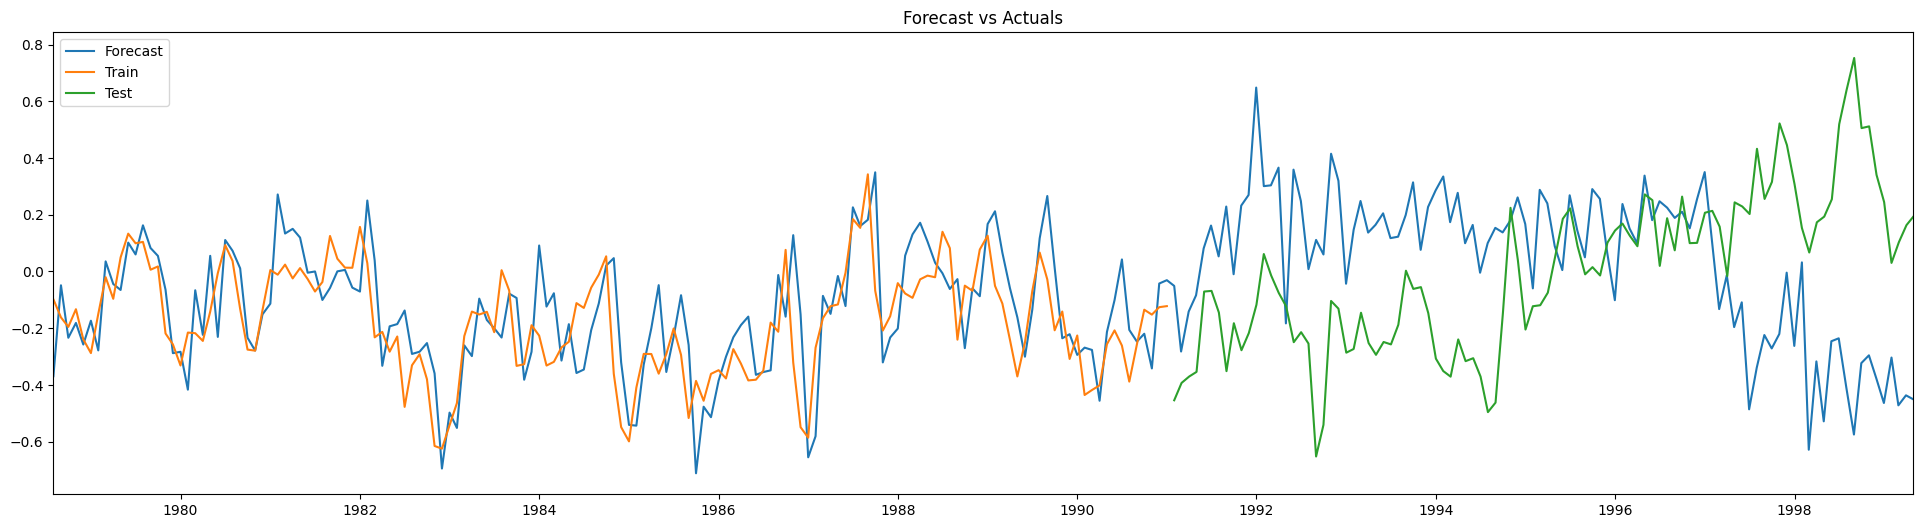

In [145]:
# plot the forecast with df_train and df_test with matplotlig
import matplotlib.pyplot as plt

# Plot the forecast with the actual values
plt.figure(figsize=(24, 6))
plt.plot(forecast['ds'], forecast['yhat_final'], label='Forecast')
plt.plot(df_train['ds'], df_train['y'], label='Train')
plt.plot(df_test['ds'][:100], df_test['y'][:100], label='Test')
# plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='k', alpha=0.1)
plt.title('Forecast vs Actuals')
plt.legend()
plt.xlim([df_train['ds'][600], forecast['ds'].max()])
plt.show()

# plot_forecast(df_train, df_test, forecast, test_metrics)

In [133]:
best_model_params

{'epochs': 200,
 'daily_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'yearly_seasonality': 'auto',
 'loss_func': 'MAE',
 'seasonality_mode': 'multiplicative',
 'n_changepoints': 60,
 'learning_rate': 0.001}

In [60]:
df_train_2=df_train.copy()
df_train_2['ds'] = pd.to_datetime(df_train_2['ds'])

# Function to find the closest first day of the month
def closest_first_day(date):
    first_day_this_month = date.replace(day=1)
    first_day_next_month = first_day_this_month + pd.offsets.MonthBegin(1)
    if date.day > 15:
        return first_day_next_month
    else:
        return first_day_this_month

# Apply the function to each date in the 'dates' column
df_train_2['ds_new'] =df_train_2['ds'].apply(closest_first_day)

print(df_train_2)

           y         ds     ds_new
0  -0.293288 2015-12-01 2015-12-01
1  -0.317625 2016-01-01 2016-01-01
2  -0.390225 2016-02-01 2016-02-01
3  -0.318396 2016-03-01 2016-03-01
4  -0.321321 2016-04-01 2016-04-01
5  -0.310451 2016-05-01 2016-05-01
6  -0.063297 2016-06-01 2016-06-01
7   0.096580 2016-07-01 2016-07-01
8   0.222355 2016-08-01 2016-08-01
9   0.420914 2016-09-01 2016-09-01
10  0.089850 2016-10-01 2016-10-01
11 -0.069387 2016-11-01 2016-11-01
12  0.133713 2016-12-01 2016-12-01
13  0.139537 2017-01-01 2017-01-01
14  0.122547 2017-02-01 2017-02-01
15  0.035776 2017-03-01 2017-03-01
16 -0.011846 2017-04-01 2017-04-01
17  0.057456 2017-05-01 2017-05-01
18  0.000711 2017-06-01 2017-06-01
19 -0.039706 2017-07-01 2017-07-01
20 -0.006986 2017-08-01 2017-08-01
21  0.077827 2017-09-01 2017-09-01
22  0.277510 2017-10-01 2017-10-01
23  0.201689 2017-11-01 2017-11-01
24  0.183729 2017-12-01 2017-12-01
25  0.378177 2018-01-01 2018-01-01
26  0.149233 2018-02-01 2018-02-01
27  0.057357 2018-03

In [68]:
# read csv
import pandas as pd

train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[1]
test = test_size[1]

forecast = pd.read_csv(f'../outputs/{train}_{test}/forecast.csv')
test_metrics = pd.read_csv(f'../outputs/{train}_{test}/test_metrics.csv')

def select_yhat(row, yhat_columns):
    for col in yhat_columns:
        if pd.notna(row[col]) and row[col] != 0:
            return row[col]
    return np.nan

In [69]:
yhat_columns = [col for col in forecast.columns if col.startswith('yhat')]
forecast['yhat_final'] = forecast.apply(select_yhat, axis=1, yhat_columns=yhat_columns)

In [70]:
import plotly.graph_objects as go
from plotly_resampler import FigureResampler

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)

df_train['ds'] = pd.to_datetime(df_train['ds'])
df_test['ds'] = pd.to_datetime(df_test['ds'])

# Function to find the closest first day of the month
def closest_first_day(date):
    first_day_this_month = date.replace(day=1)
    first_day_next_month = first_day_this_month + pd.offsets.MonthBegin(1)
    if date.day > 15:
        return first_day_next_month
    else:
        return first_day_this_month

# Apply the function to each date in the 'dates' column
df_train['ds'] =df_train['ds'].apply(closest_first_day)
df_test['ds'] =df_test['ds'].apply(closest_first_day)

def plot_time_series_for_each_id(df, test_data,  forecast, test_metrics):
    """Plots time series data for each ID or a single plot if no ID column."""

    if 'ID' in df.columns:
        unique_ids = df['ID'].unique()
        for id_value in unique_ids:
            plot_time_series(forecast[forecast['ID'] == id_value].reset_index(drop=True), id_value, test_metrics)
    else:
        plot_time_series(forecast,test_data, None, test_metrics)

def plot_time_series(forecast_data, test_data, id_value=None, test_metrics=None):
    """Plots time series data for a single ID or full dataset."""

    future_start_index = forecast_data['y'].last_valid_index() + 1

    fig = go.Figure()
    fig.add_trace(go.Scattergl(x=forecast_data['ds'], y=forecast_data['y'], mode='lines', name='Actual'))
    fig.add_trace(go.Scattergl(x=forecast_data['ds'][:future_start_index+1], y=forecast_data['yhat_final'][:future_start_index+1],
                                mode='lines', name='Predicted (Past)', line=dict(color='blue')))
    fig.add_trace(go.Scattergl(x=forecast_data['ds'][future_start_index:], y=forecast_data['yhat_final'][future_start_index:],
                                mode='lines', name='Predicted (Future)', line=dict(color='#FF00FF')))

    mae = test_metrics['MAE'][0]
    rmse = test_metrics['RMSE'][0]
    fig.add_annotation(text=f'Test MAE: {mae:.2f}<br>Test RMSE: {rmse:.2f}',
                        xref='paper', yref='paper',
                        x=1, y=0, showarrow=False, font=dict(size=12),
                        align="left", bordercolor="black", borderwidth=2,
                        bgcolor="white", opacity=0.8)

    title = f'Time Series Plot for ID: {id_value}' if id_value else 'Time Series Plot'
    fig.update_layout(title=title, xaxis_title='ds', yaxis_title='Values')
    # Use Plotly Resampler to optimize rendering
    fig.add_trace(go.Scattergl(x=test_data['ds'], y=test_data['y'], mode='lines', name='Test data'))
  

    fig = FigureResampler(fig).show()

# Call the function with your DataFrame, forecast DataFrame, and test metrics
plot_time_series_for_each_id(df_train, df_test, forecast, test_metrics)

# Add the test data to the plot